In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor






# ***EDA***

In [17]:
data = pd.read_csv("Customer Purchasing Behaviors.csv")
.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13


In [18]:
data.drop(['user_id'], axis = 1, inplace = True)

In [19]:
data.head()

,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,25,45000,200,4.5,North,12
1,34,55000,350,7.0,South,18
2,45,65000,500,8.0,West,22
3,22,30000,150,3.0,East,10
4,29,47000,220,4.8,North,13


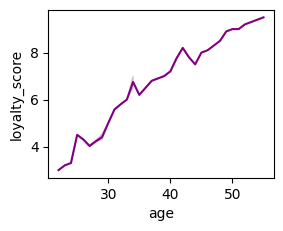

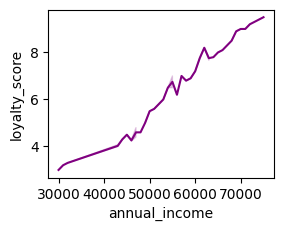

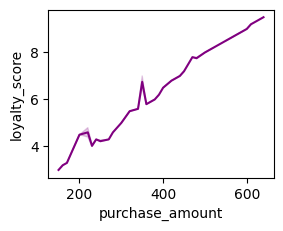

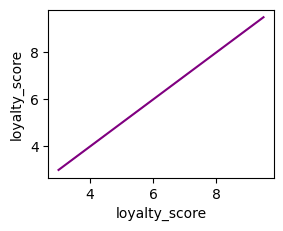

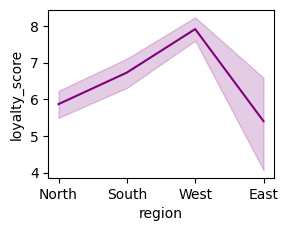

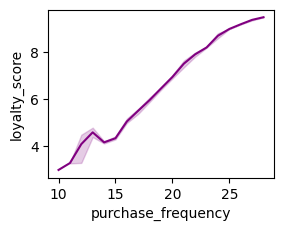

In [20]:
for column in data.columns:
  plt.subplot(2,2,2)
  sns.lineplot(x = column, y = "loyalty_score", data = data, color = "purple")
  plt.show()

<Axes: xlabel='region', ylabel='loyalty_score'>

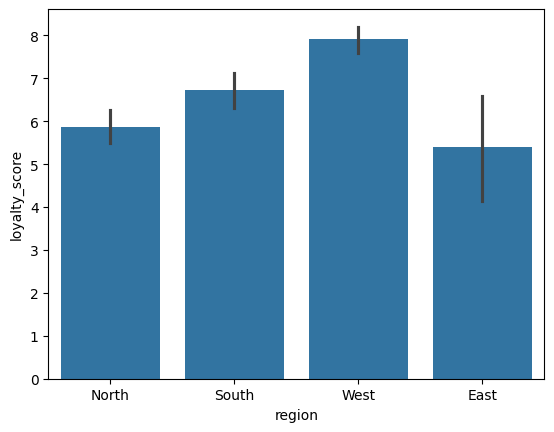

In [21]:
sns.barplot(x = 'region', y = 'loyalty_score', data = data)

In [22]:
le = LabelEncoder()
data['region'] = le.fit_transform(data['region'])

In [23]:
data.head()

,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,25,45000,200,4.5,1,12
1,34,55000,350,7.0,2,18
2,45,65000,500,8.0,3,22
3,22,30000,150,3.0,0,10
4,29,47000,220,4.8,1,13


# ***Model (Linear Regression)***

In [34]:
lr = LinearRegression()
x = data.drop(['loyalty_score'], axis = 1)
y = data['loyalty_score']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [36]:
lr.fit(x_train, y_train)

LinearRegression()

In [37]:
y_predict = lr.predict(x_test)

In [43]:
r2 = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
print("R2_score: ", r2*100)
print("mse: ", mse*100)

R2_score:  99.1098466593405
mse:  3.6792850206748633


# ***Model(Random Forest Regression)***

In [49]:
rfr = RandomForestRegressor(n_estimators = 10, random_state = 42)
rfr = rfr.fit(x_train, y_train)
y_predict = rfr.predict(x_test)
r2 = r2_score(y_test, y_predict)
mse1 = mean_squared_error(y_test, y_predict)
print('R2_score: ', r2*100)
print('MSE: ', mse1*100)

R2_score:  99.944152991234
MSE:  0.23083333333333345
